In [3]:
#Импорт необходимых библиотек

from sklearn import datasets
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [4]:
def sigmoid(z):
    final_result = 1/(1+np.exp(-z))  #вычисляет сигмоиду для преобразования чисел в диапазоне [0,1]
    return final_result

def log_loss(w, X, y):
    # здесь должны быть рассчитаны параметры градиента и значение функции потерь
    z = np.dot(X, w) #линейная комбинация признаков z=Xw (произведение вектора признаков и весов)
    probability = sigmoid(z) #вычисляем вероятности по сигмоиде
    epsilon = 1e-15  # Для избежания деления на ноль
    loss = -np.mean(y * np.log(probability + epsilon) + (1 - y) * np.log(1 - probability + epsilon))  #расчет функции потерь
    grad = np.dot(X.T, (probability - y)) / len(y) #расчет градиента
    return loss, grad

def optimize(w, X, y, n_iterations, eta):
    # потери будем записывать в список для отображения в виде графика
    losses = []
    for i in range(n_iterations):
        loss, grad = log_loss(w, X, y)
        w = w - eta * grad
        losses.append(loss)
    return w, losses

def predict(w, X, b=0.5):  #порог отнесения = 0.5
    A = np.dot(X, w) #вычисление линейной комбинации и вероятности
    p = sigmoid(A)
    y_predicted = np.empty_like(p, dtype=int) #массив для сохранения результата
    for i in range(len(p)): #вычисление класса по порогу
        if p[i] >= b:
            y_predicted[i] = 1
        else:
            y_predicted[i] = 0
    return y_predicted


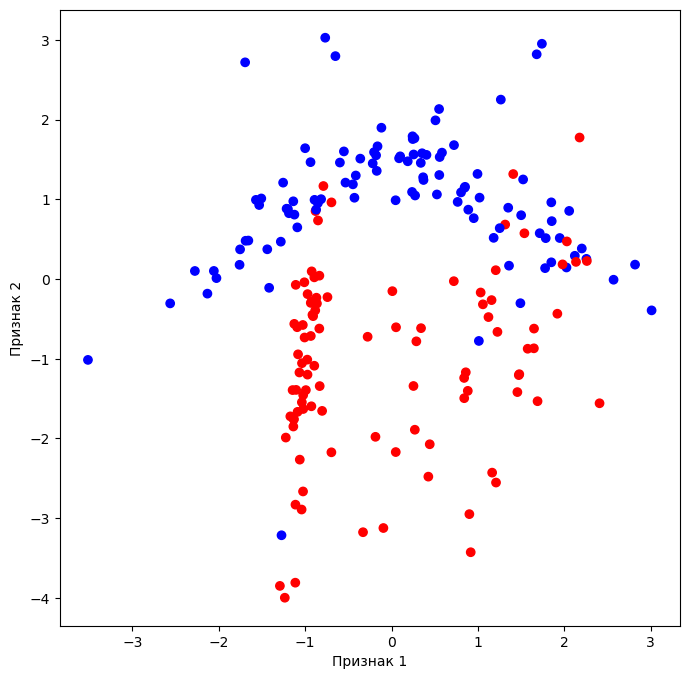

In [5]:
#генерация данных и количества классов, изображаем их на графике

classes = datasets.make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=1)
X, y = classes

colors = ListedColormap(['red', 'blue'])

plt.figure(figsize=(8, 8))
plt.scatter([x[0] for x in classes[0]], [x[1] for x in classes[0]], c=classes[1], cmap=colors)
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.show()

X_bias = np.hstack((np.ones((X.shape[0], 1)), X)) #добавляем столбец единиц

In [9]:
# перемешивание датасета
np.random.seed(12) # это число позволяет постоянно получать одну и ту же "случайность"
shuffle_index = np.random.permutation(classes[0].shape[0])
X_shuffled, y_shuffled = classes[0][shuffle_index], classes[1][shuffle_index]

# разбивка на обучающую и тестовую выборки
train_proportion = 0.7
train_test_cut = int(len(classes[0]) * train_proportion)

X_train, X_test, y_train, y_test = \
    X_shuffled[:train_test_cut], \
    X_shuffled[train_test_cut:], \
    y_shuffled[:train_test_cut], \
    y_shuffled[train_test_cut:]

print("Размер массива признаков обучающей выборки", X_train.shape)
print("Размер массива признаков тестовой выборки", X_test.shape)
print("Размер массива ответов для обучающей выборки", y_train.shape)
print("Размер массива ответов для тестовой выборки", y_test.shape)


Размер массива признаков обучающей выборки (140, 2)
Размер массива признаков тестовой выборки (60, 2)
Размер массива ответов для обучающей выборки (140,)
Размер массива ответов для тестовой выборки (60,)


In [11]:
#транспонирование матрицы данных для удобства работы со строками

X_train_tr = X_train.transpose()
y_train_tr = y_train.reshape(1, y_train.shape[0])
X_test_tr = X_test.transpose()
y_test_tr = y_test.reshape(1, y_test.shape[0])

In [13]:
np.random.seed(42)
w_init = np.random.randn(X_bias.shape[1])  #для генерации случайного начального веса

In [15]:
n_iterations = 1000 #Параметры оптимизации
eta = 0.1

w, losses = optimize(w_init, X_bias, y, n_iterations, eta) #обучени модели и предсказание

y_pred = predict(w, X_bias)
accuracy = np.mean(y_pred == y)
test_accuracy = 100.0 - np.mean(np.abs(y_pred - y) * 100.0)
print("\nРезультаты обучения:")
print("Оптимизированные веса:", w)
print(f"Финальное значение Log Loss: {losses[-1]:.4f}")
print(f"Точность модели: {accuracy * 100:.2f}%")
print(f"Доля правильных ответов: {test_accuracy:.4f}")


Результаты обучения:
Оптимизированные веса: [-0.15759784 -0.12891096  2.15140581]
Финальное значение Log Loss: 0.3460
Точность модели: 87.00%
Доля правильных ответов: 87.0000


In [17]:
#Расчет матрицы ошибок и метрик

conf_matrix = confusion_matrix(y, y_pred)
print("Матрица ошибок:")
print(conf_matrix)

precision = precision_score(y, y_pred)
print(f"Precision = {precision}")

precision = recall_score(y, y_pred)
print(f"Recall = {precision}")

precision = f1_score(y, y_pred)
print(f"F1 = {precision}")

Матрица ошибок:
[[84 14]
 [12 90]]
Precision = 0.8653846153846154
Recall = 0.8823529411764706
F1 = 0.8737864077669902


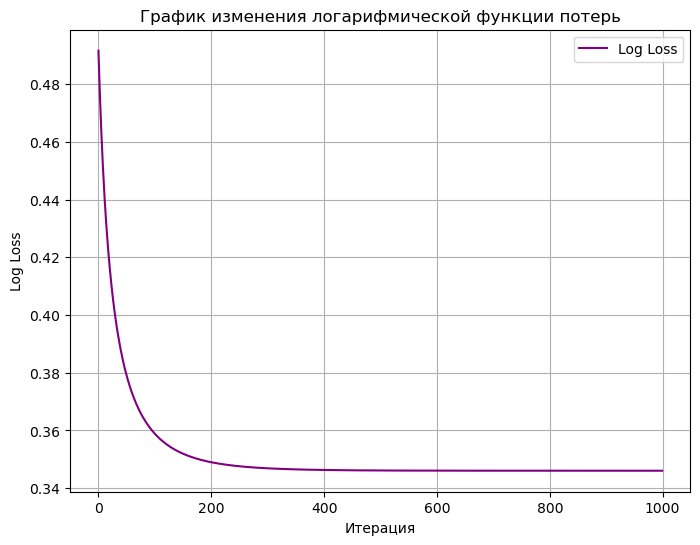

In [19]:
#Изменения функции потерь
plt.figure(figsize=(8, 6))
plt.plot(losses, label="Log Loss", color='purple')
plt.xlabel('Итерация')
plt.ylabel('Log Loss')
plt.title('График изменения логарифмической функции потерь')
plt.legend()
plt.grid(True)
plt.show()

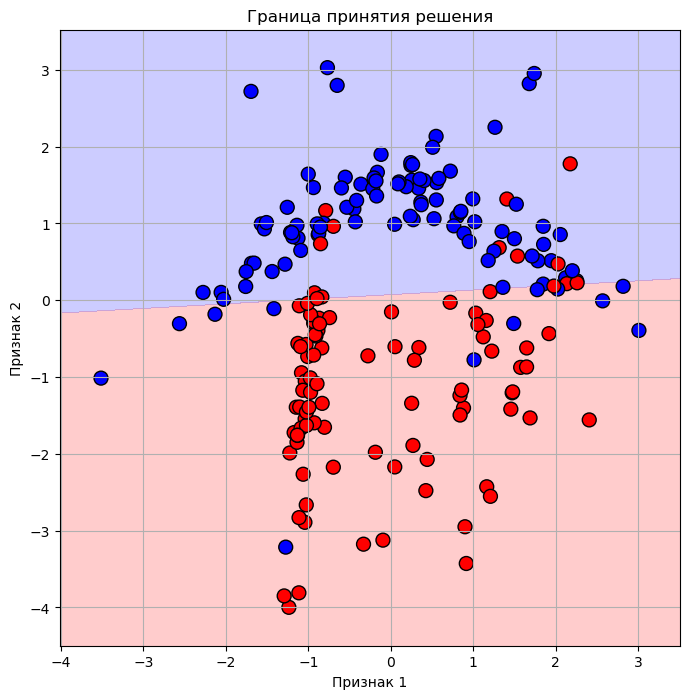

In [21]:
#Визуализация распределения классов и разделяющей гиперплоскости
def plot_decision_boundary(w, X, y):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Столбец единиц для интерсепта 
    grid = np.c_[np.ones(xx.ravel().shape), xx.ravel(), yy.ravel()]
    probs = sigmoid(np.dot(grid, w)).reshape(xx.shape)
    
    plt.figure(figsize=(8, 8))
    plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], alpha=0.2, colors=['red', 'blue'])
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors, edgecolor='k', s=100)
    plt.title('Граница принятия решения')
    plt.xlabel('Признак 1')
    plt.ylabel('Признак 2')
    plt.grid(True)
    plt.show()

plot_decision_boundary(w, X, y)

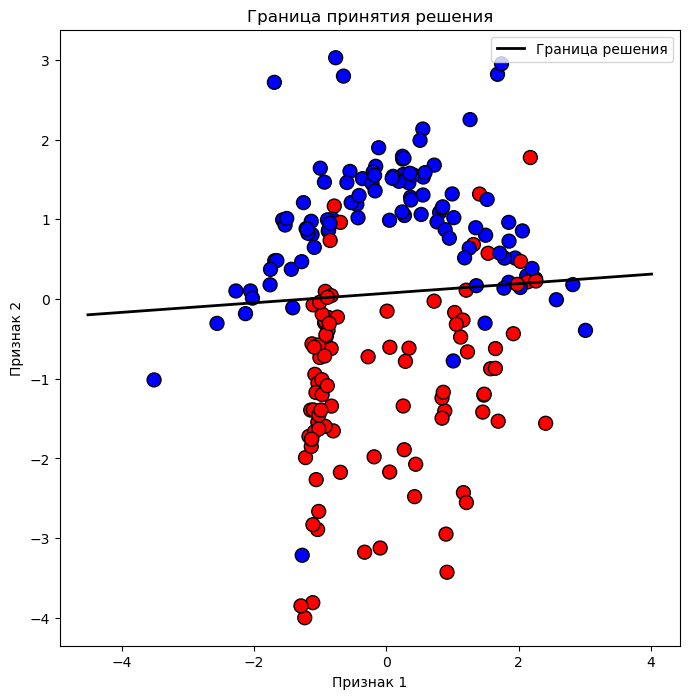

In [23]:
#Визуализация данных (на исходных)
classes = (X, y)

data = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)

#Преобразование вектора весов
w = w.reshape(-1, 1)
#Уравнение границы
y_boundary = -(w[0, 0] + w[1, 0]*data) / w[2, 0]

plt.figure(figsize=(8, 8))
plt.scatter([x[0] for x in classes[0]], [x[1] for x in classes[0]],
            c=classes[1], cmap=colors, edgecolor="k", s=100)
plt.plot(data, y_boundary, color='black', linewidth=2, label='Граница решения')
plt.title("Граница принятия решения")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.legend()
plt.show()

Ответы на вопросы

1. Как влияет размер шага (eta) на сходимость алгоритма?
    Размер шага обучения напрямую влияет на сходимость градиентного спуска. Если шаг слишком маленький, то тогда обновление весов происходит медленнее,
и из-за этого увеличивается количество вычислительных затрат до достижения оптимума. Несмотря на то, что количество итераций возрастет, в то же самое время график функции потерь будет более гладким.
    Если шаг слишком большой, то, в первую очередь, есть риск "проскочить" оптимальное значение, из-за чего алгоритм может не сойтись. Веса обновляются
быстро, из-за чего алгоритм может быть нестабильным и вызывать колебания. Следовательно, важно всегда уделять особое внимание выбору оптимального значения шага обучения, чтобы избежать негативных последствий обеих ситуаций.

2. Что произойдет, если выбрать слишком маленькое или слишком большое количество итераций (n_iterations)?
    Если выбрано слишком маленькое количество итераций, то в таком случае есть риск не дойти до минимума функции потерь. Это приведет к недообучению модели, что скажется на точности ее предсказаний.
    Если же выбрано слишком большое количество итераций, то в таком случае есть риск "перескочить" оптимальное значение, но при этом будет продолжаться обновление весов, что приведет к увеличению вычислительных затрат, но не скажется на общем улучшении алгоритма. Если же модель обучается слишком долго, то это потенциально приведет к переобучению (так как модель привыкнет работать с одними и теми же данными). Следовательно, нужно выбрать не слишком маленькое количество итераций, но следить, не переобучена ли модель.
   
3. Почему логистическая регрессия подходит для задач только бинарной классификации?
    Изначально логистическая регрессия создавалась для классификации объектов между 2 классами (0 и 1), а также сигмоидная функция, лежащая в основе данного алгоритма, переводит все исходные числовые данные в числа, принадлежащие [0,1]. Это удобно для анализа вероятности. Таким образом, классическое решение для бинарной классификации - логистическая регрессия, хотя существуют инструменты, позволяющие применять ее для 3 и более классов (например, one-vs-all или one-vs-rest).